In [0]:
import numpy as np
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras import optimizers

In [0]:
import pandas as pd
from math import sqrt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as sio

In [0]:
dataset = sio.loadmat('Train.mat')
a = list(dataset.values())
x_train = a[3]

dataset = sio.loadmat('test.mat')
a = list(dataset.values())
x_test = a[3]

y_train = x_train[:,(x_train.shape[1]-1):x_train.shape[1]]
x_train = x_train[:,0:(x_train.shape[1]-1)]

y_test = x_test[:,(x_test.shape[1]-1):x_test.shape[1]]
x_test = x_test[:,0:(x_test.shape[1]-1)]

In [0]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [0]:
x_train_scaled=np.reshape(x_train_scaled, (int(x_train_scaled.shape[0]/5), 5, x_train_scaled.shape[1]))
x_test_scaled=np.reshape(x_test_scaled, (int(x_test_scaled.shape[0]/5), 5, x_test_scaled.shape[1]))

In [0]:
#y_train=y_train.values
y_train=np.reshape(y_train, (int(y_train.shape[0]/5), 5, y_train.shape[1]))
#y_test=y_test.values
y_test=np.reshape(y_test, (int(y_test.shape[0]/5), 5, y_test.shape[1]))

In [0]:
model = Sequential()

model.add(LSTM(10, input_shape=(5, 11), return_sequences=True,))
#model.add(Dropout(0.2))

model.add(LSTM(30, input_shape=(5, 11), return_sequences=True,))
#model.add(Dropout(0.2))

model.add(LSTM(50, input_shape=(5, 11), return_sequences=True,))
#model.add(Dropout(0.2))

model.add(LSTM(100, input_shape=(5, 11), return_sequences=True,))
#model.add(Dropout(0.2))

model.add(TimeDistributed(Dense(1, activation='relu')))

model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 10)             880       
_________________________________________________________________
lstm_6 (LSTM)                (None, 5, 30)             4920      
_________________________________________________________________
lstm_7 (LSTM)                (None, 5, 50)             16200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 5, 100)            60400     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 1)              101       
Total params: 82,501
Trainable params: 82,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train_scaled, y_train, epochs=15, batch_size=5, verbose=1)

Epoch 1/15
500/500 [==============================] - 4s 9ms/step - loss: 0.0344 - mean_absolute_error: 0.1193
Epoch 2/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0249 - mean_absolute_error: 0.1041
Epoch 3/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0194 - mean_absolute_error: 0.0906
Epoch 4/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0155 - mean_absolute_error: 0.0789
Epoch 5/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0142 - mean_absolute_error: 0.0723
Epoch 6/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0132 - mean_absolute_error: 0.0692
Epoch 7/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0129 - mean_absolute_error: 0.0670
Epoch 8/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0124 - mean_absolute_error: 0.0659
Epoch 9/15
500/500 [==============================] - 2s 3ms/step - loss: 0.0128 - mean_absolute_error: 0.0654
E

In [0]:
[loss, mae] = model.evaluate(x_test_scaled, y_test, batch_size=12, verbose=1)
print('Test loss:', loss)
print('Test mae:', mae)

98/98 [==============================] - 1s 7ms/step
Test loss: 0.009753269580553989
Test mae: 0.06739544366695444


In [0]:
Y_prediction = model.predict(x_test_scaled)
score_R = (1-((Y_prediction-y_test) ** 2).sum()/((y_test-y_test.mean()) ** 2).sum())
print(score_R)

0.6010292820478422


In [0]:
Y_actual_48 = y_test[0:48,:,:]
y_prediction_48 = model.predict(x_test_scaled[0:48,:,:])

Y_actual_48=np.reshape(Y_actual_48,(-1,1))
y_prediction_48=np.reshape(y_prediction_48,(-1,1))
y_prediction_48.shape

(240, 1)

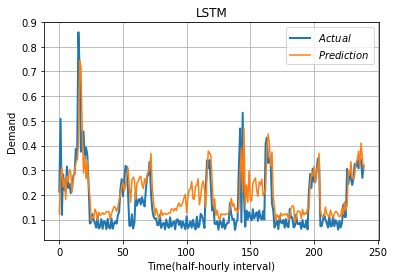

In [0]:
plt.plot(range(240), Y_actual_48, label="$Actual$", linewidth=2)
plt.plot(range(240), y_prediction_48, label="$Prediction$")
plt.xlabel("Time(half-hourly interval)")
plt.ylabel("Demand")
plt.title("LSTM")
plt.grid()
plt.legend()
plt.show()